In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import xesmf as xe
import cartopy.crs as ccrs

In [2]:
path='/scratch/jgaigala/'
file='asr15km.anl.2D.200001.mon.nc'
var='SNOALB'
#var='T2M'

In [3]:
ds=xr.open_dataset(path+file)
ds

<xarray.Dataset>
Dimensions:   (Time: 1, lev: 4, x: 720, y: 720)
Coordinates:
  * Time      (Time) datetime64[ns] 2000-01-16T11:00:00
    XLAT      (y, x) float32 ...
    XLONG     (y, x) float32 ...
  * lev       (lev) float64 1.0 2.0 3.0 4.0
Dimensions without coordinates: x, y
Data variables:
    DateTime  (Time) int32 ...
    ALBBCK    (Time, y, x) float32 ...
    ALBEDO    (Time, y, x) float32 ...
    ALBSI     (Time, y, x) float32 ...
    ICEDEPTH  (Time, y, x) float32 ...
    ISLTYP    (Time, y, x) int32 ...
    IVGTYP    (Time, y, x) int32 ...
    LAI       (Time, y, x) float32 ...
    LANDMASK  (Time, y, x) float32 ...
    LU_INDEX  (Time, y, x) float32 ...
    PMSL      (Time, y, x) float32 ...
    PSFC      (Time, y, x) float32 ...
    Q2M       (Time, y, x) float32 ...
    RH2M      (Time, y, x) float32 ...
    SEAICE    (Time, y, x) float32 ...
    SH2O      (Time, lev, y, x) float32 ...
    SKINTEMP  (Time, y, x) float32 ...
    SMOIS     (Time, lev, y, x) float32 ...
    SNOALB    (Time, y, x) float32 ...
    SNOW      (Time, y, x) float32 ...
    SNOWC     (Time, y, x) float32 ...
    SNOWH     (Time, y, x) float32 ...
    SST       (Time, y, x) float32 ...
    T2M       (Time, y, x) float32 ...
    TSLB      (Time, lev, y, x) float32 ...
    U10E      (Time, y, x) float32 ...
    U10M      (Time, y, x) float32 ...
    V10E      (Time, y, x) float32 ...
    V10M      (Time, y, x) float32 ...
    VEGFRA    (Time, y, x) float32 ...
Attributes:
    CDI:                             Climate Data Interface version 1.5.4 (ht...
    Conventions:                     CF-1.4
    TITLE:                           Arctic System Reanalysis - The Ohio Stat...
    WEST-EAST_GRID_DIMENSION:        721
    SOUTH-NORTH_GRID_DIMENSION:      721
    BOTTOM-TOP_GRID_DIMENSION:       34
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          1
    DAMP_OPT:                        0
    MP_PHYSICS:                      7
    RA_LW_PHYSICS:                   0
    RA_SW_PHYSICS:                   0
    SF_SFCLAY_PHYSICS:               5
    SF_SURFACE_PHYSICS:              2
    BL_PBL_PHYSICS:                  1
    CU_PHYSICS:                      1
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      0
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 1
    WEST-EAST_PATCH_START_UNSTAG:    1
    WEST-EAST_PATCH_END_UNSTAG:      720
    WEST-EAST_PATCH_START_STAG:      1
    WEST-EAST_PATCH_END_STAG:        721
    SOUTH-NORTH_PATCH_START_UNSTAG:  1
    SOUTH-NORTH_PATCH_END_UNSTAG:    720
    SOUTH-NORTH_PATCH_START_STAG:    1
    SOUTH-NORTH_PATCH_END_STAG:      721
    GRID_ID:                         1
    PARENT_ID:                       0
    PARENT_GRID_RATIO:               1
    MAP_PROJ:                        2
    MMINLU:                          MODIFIED_IGBP_MODIS_NOAH
    NUM_LAND_CAT:                    20
    ISWATER:                         17
    ISLAKE:                          -1
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    I_PARENT_START:                  1
    J_PARENT_START:                  1
    IFNDALBSI:                       1
    IFNDICEDEPTH:                    1
    IFNDSNOWSI:                      1
    CDO:                             Climate Data Operators version 1.5.4 (ht...
    history:                         Wed Mar 15 21:08:02 2017: ./ncks -C -O -...
    NCO:                             4.2.1

In [4]:
ds[var].values

array([[[0.08 , 0.08 , 0.08 , ..., 0.08 , 0.08 , 0.08 ],
        [0.08 , 0.08 , 0.08 , ..., 0.08 , 0.08 , 0.08 ],
        [0.08 , 0.08 , 0.08 , ..., 0.08 , 0.08 , 0.08 ],
        ...,
        [0.809, 0.809, 0.809, ..., 0.08 , 0.08 , 0.08 ],
        [0.809, 0.809, 0.809, ..., 0.08 , 0.08 , 0.08 ],
        [0.809, 0.809, 0.809, ..., 0.08 , 0.08 , 0.08 ]]], dtype=float32)

Text(0, 0.5, 'lat')

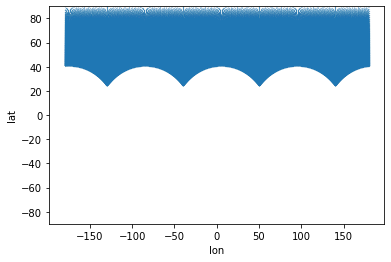

In [5]:
plt.scatter(ds['XLONG'], ds['XLAT'], s=0.01)  # plot grid locations
plt.ylim([-90, 90])
plt.xlabel('lon')
plt.ylabel('lat')

In [6]:
ds = ds.rename({'XLONG': 'lon', 'XLAT': 'lat'})

In [7]:
new_lat=np.arange(-90,90.5,0.5)
new_lon=np.arange(0,360.1,0.1)

ds_out = xr.Dataset({'lat': (['lat'], new_lat),
                    'lon': (['lon'], new_lon)
                    })
regridder = xe.Regridder(ds, ds_out,'bilinear')
dr_out = regridder(ds[var],ds_out).to_dataset(name=var)
dr_out

Create weight file: bilinear_720x720_361x3601.nc


<xarray.Dataset>
Dimensions:  (Time: 1, lat: 361, lon: 3601)
Coordinates:
  * Time     (Time) datetime64[ns] 2000-01-16T11:00:00
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9 360.0
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Data variables:
    SNOALB   (Time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.7473 0.7473 0.7473

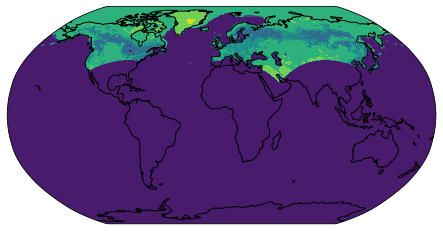

In [8]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.Robinson())
ax.contourf(dr_out['lon'],dr_out['lat'],dr_out[var][0,:,:],
            transform=ccrs.PlateCarree())
ax.coastlines()

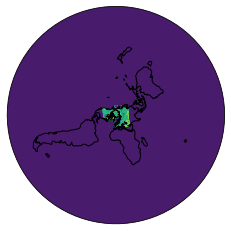

In [9]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
ax.contourf(dr_out['lon'],dr_out['lat'],dr_out[var][0,:,:],
            transform=ccrs.PlateCarree())
ax.coastlines()

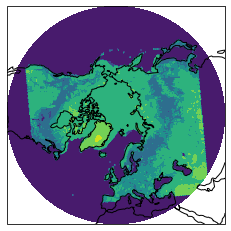

In [10]:
# Select arctic region
dr_arctic=dr_out.sel(lat=slice(30,90))
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
ax.contourf(dr_arctic['lon'],dr_arctic['lat'],dr_arctic[var][0,:,:],
            transform=ccrs.PlateCarree())
ax.coastlines()